<a href="https://colab.research.google.com/github/ashiyaaa121/AI-worksheet/blob/main/Workshop7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import kagglehub
# Import the kagglehub library which is used to download datasets from Kaggle

# Download latest version
path = kagglehub.dataset_download("camnugent/california-housing-prices")
# Downloads the latest version of the California Housing Prices dataset from Kaggle
# The dataset is stored locally and the path to the downloaded files is returned

print("Path to dataset files:", path)
# Prints the local file system path where the dataset has been downloaded


Using Colab cache for faster access to the 'california-housing-prices' dataset.
Path to dataset files: /kaggle/input/california-housing-prices


In [8]:
from sklearn.datasets import fetch_california_housing
# Imports the California Housing dataset loader from scikit-learn

from sklearn.model_selection import train_test_split
# Used to split the dataset into training and testing sets

import pandas as pd
# Imports pandas for data manipulation and analysis using DataFrames

from sklearn.linear_model import LinearRegression
# Imports Linear Regression model for predicting continuous values

from sklearn.metrics import mean_squared_error, r2_score
# Imports evaluation metrics to measure model performance (error and accuracy)

import numpy as np
# Imports NumPy for numerical operations and array handling

import matplotlib.pyplot as plt
# Imports Matplotlib for data visualization and plotting graphs

from sklearn.preprocessing import StandardScaler
# Used to standardize features by removing the mean and scaling to unit variance

from sklearn.linear_model import Ridge, Lasso
# Imports Ridge and Lasso regression models for regularization

from sklearn.model_selection import GridSearchCV
# Used for hyperparameter tuning using cross-validation

from sklearn.metrics import mean_squared_error, r2_score
# Imports evaluation metrics again (duplicate import, but kept unchanged)


In [9]:
dataset_path = "/kaggle/input/california-housing-prices/housing.csv"
dataset = pd.read_csv(dataset_path)
dataset = dataset.dropna()
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
# feature engineering
# Preparing input features (X) and target variable (Y)

X = dataset.drop(columns=['median_house_value'], axis=1)
# Removes the target column from the dataset to create feature set X

Y = dataset['median_house_value']
# Stores the target variable (house prices) in Y

X = pd.get_dummies(X, columns=['ocean_proximity'], drop_first=True)
# Converts the categorical column 'ocean_proximity' into numerical dummy variables
# drop_first=True avoids the dummy variable trap (multicollinearity)

print(X.columns.tolist())
# Prints the list of feature column names after encoding

print(f"\nX shape: {X.shape}")
# Displays the shape of X → (number_of_rows, number_of_features)

x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)
# Splits the dataset into training (80%) and testing (20%) sets
# random_state=42 ensures reproducibility of the split


['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']

X shape: (20433, 12)


In [11]:
# Scale the features AND target variable
# Standardization helps models perform better by normalizing the data

scaler_X = StandardScaler()  # for features
# Creates a scaler object to standardize input features (X)

scaler_y = StandardScaler()  # for target
# Creates a separate scaler object to standardize the target variable (y)

x_train_scaled = scaler_X.fit_transform(x_train)
# Fits the scaler on training features and transforms them

x_test_scaled = scaler_X.transform(x_test)
# Transforms test features using the same scaler (no refitting to avoid data leakage)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
# Reshapes y_train to 2D because StandardScaler expects 2D input
# ravel() converts the scaled output back to 1D array

y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()
# Applies the same scaling to test target values
# ravel() converts 2D array back to 1D


In [12]:
linear_model = LinearRegression()
# Creates a Linear Regression model instance

linear_model.fit(x_train_scaled, y_train_scaled)
# Trains (fits) the linear regression model using the scaled training data
# The model learns the relationship between features and the target variable


LinearRegression()

In [13]:
LinearRegression()
# Initializes a Linear Regression model with default parameters
# This object can later be used to train a regression model using .fit()


LinearRegression()

In [14]:
y_train_pred = linear_model.predict(x_train_scaled)
# Predicts target values for the training dataset using the trained model

y_test_pred = linear_model.predict(x_test_scaled)
# Predicts target values for the test dataset to evaluate model performance


In [15]:
train_mse = mean_squared_error(y_train_scaled, y_train_pred)
# Calculates Mean Squared Error for the training data
# Measures how close the predicted values are to the actual scaled training values

test_mse = mean_squared_error(y_test_scaled, y_test_pred)
# Calculates Mean Squared Error for the test data
# Used to evaluate how well the model generalizes to unseen data

print(train_mse)
# Prints the training Mean Squared Error

print(test_mse)
# Prints the testing Mean Squared Error


0.3543517602353898
0.36278746237466286


In [16]:
# Display coefficients
# Shows how strongly each feature influences the target variable

coefficients_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': linear_model.coef_
})
# Creates a DataFrame that pairs each feature name with its learned coefficient

print("\nTop 10 Model Coefficients:")
# Prints a heading for the output

print(coefficients_df.sort_values('Coefficient', key=abs, ascending=False).head(10))
# Sorts coefficients by absolute value (most influential first)
# Displays the top 10 features with the strongest impact on predictions



Top 10 Model Coefficients:
                  Feature  Coefficient
7           median_income     0.647872
1                latitude    -0.476378
0               longitude    -0.472620
4          total_bedrooms     0.373744
5              population    -0.357397
8  ocean_proximity_INLAND    -0.158489
6              households     0.141739
3             total_rooms    -0.118322
2      housing_median_age     0.118209
9  ocean_proximity_ISLAND     0.025155


In [17]:
print(f"\nTraining set size: {x_train_scaled.shape[0]}")
# Prints the number of samples (rows) in the training set
# x_train_scaled.shape returns a tuple: (number_of_rows, number_of_features)
# shape[0] gives the number of rows

print(f"Test set size: {x_test_scaled.shape[0]}")
# Prints the number of samples (rows) in the test set



Training set size: 16346
Test set size: 4087


In [18]:
print("\n" + "="*70)
# "\n" inserts a blank line before the output
# "=" * 70 repeats the '=' character 70 times, creating a visual separator

print("STEP 2: HYPERPARAMETER TUNING WITH GRIDSEARCHCV")
# Clearly labels the next phase of the workflow → Model optimization
# Indicates that we are now performing hyperparameter tuning using GridSearchCV

print("="*70)
# Another separator line to create a boxed header effect
# Helps visually separate sections in the console output and makes it easier to read



STEP 2: HYPERPARAMETER TUNING WITH GRIDSEARCHCV


In [19]:
# Define the grid of alpha values (regularization strength)
# These are the hyperparameter values that GridSearchCV will test
# Alpha controls how strongly Ridge or Lasso penalizes large coefficients:
#   - Small alpha → weak regularization (model can fit training data closely)
#   - Large alpha → strong regularization (coefficients shrink toward zero)
alpha_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

print("\nAlpha values to test:", alpha_grid['alpha'])
# Prints the list of alpha values that will be evaluated in hyperparameter tuning
# Helps verify that the grid is set correctly before running GridSearchCV



Alpha values to test: [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]


In [20]:
# ============================================
# RIDGE REGRESSION TUNING
# ============================================

print("\n" + "-"*70)
# Print a blank line and a separator line for visual clarity

print("RIDGE REGRESSION")
# Label this section as Ridge Regression tuning

print("-"*70)
# Another separator line to make console output easier to read

# Create Ridge model
ridge = Ridge()
# Initialize a Ridge Regression model
# Ridge regression uses L2 regularization to penalize large coefficients
# Helps reduce overfitting compared to plain linear regression

# Perform GridSearchCV with 5-fold cross-validation
ridge_grid_search = GridSearchCV(
    estimator=ridge,               # Model to tune
    param_grid=alpha_grid,         # Grid of alpha values defined earlier
    cv=5,                          # 5-fold cross-validation
    scoring='neg_mean_squared_error', # Use negative MSE as evaluation metric
    n_jobs=-1,                     # Use all CPU cores for faster computation
    verbose=1                      # Print progress messages during training
)

print("\nTraining Ridge with GridSearchCV...")
# Print message indicating Ridge hyperparameter tuning has started

ridge_grid_search.fit(x_train_scaled, y_train_scaled)
# Fit the Ridge model to the training data
# GridSearchCV will automatically:
# 1. Try all alpha values in the grid
# 2. Perform 5-fold cross-validation for each alpha
# 3. Select the alpha value that gives the best performance (lowest MSE)



----------------------------------------------------------------------
RIDGE REGRESSION
----------------------------------------------------------------------

Training Ridge with GridSearchCV...
Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
             scoring='neg_mean_squared_error', verbose=1)

In [21]:
# Get the best parameters
best_ridge_alpha = ridge_grid_search.best_params_['alpha']
# Extracts the alpha value from GridSearchCV that gave the best performance (lowest MSE)

print(f"\n✓ Best alpha for Ridge: {best_ridge_alpha}")
# Print the best alpha to the console

# Get cross-validation results
ridge_cv_results = pd.DataFrame(ridge_grid_search.cv_results_)
# Converts the GridSearchCV cross-validation results into a pandas DataFrame
# cv_results_ contains mean scores, std scores, parameters tested, and more

ridge_cv_results['mean_mse'] = -ridge_cv_results['mean_test_score']
# Convert negative MSE back to positive values for readability
# GridSearchCV maximizes score, so negative MSE was used internally

ridge_cv_results['std_mse'] = ridge_cv_results['std_test_score']
# Store standard deviation of test scores for each alpha
# Helps understand variability across the 5 folds

print("\nCross-Validation Results for Ridge:")
# Print a heading for clarity

print(ridge_cv_results[['param_alpha', 'mean_mse', 'std_mse']].to_string(index=False))
# Display a clean table with:
# - Alpha value tested
# - Mean MSE across folds
# - Standard deviation of MSE across folds
# to assess model performance and stability



✓ Best alpha for Ridge: 10

Cross-Validation Results for Ridge:
 param_alpha  mean_mse  std_mse
       0.001  0.357540 0.029032
       0.010  0.357540 0.029032
       0.100  0.357540 0.029031
       1.000  0.357534 0.029015
      10.000  0.357493 0.028856
     100.000  0.357787 0.027482
    1000.000  0.369099 0.022582
   10000.000  0.476420 0.019969


In [22]:
# Train the best Ridge model using the optimal alpha from GridSearchCV
best_ridge_model = Ridge(alpha=best_ridge_alpha)
# Initialize a Ridge regression model with the best regularization strength

best_ridge_model.fit(x_train_scaled, y_train_scaled)
# Fit the Ridge model on the scaled training data
# The model now learns coefficients that balance fit and regularization

# Make predictions on training and test sets
ridge_train_pred = best_ridge_model.predict(x_train_scaled)
ridge_test_pred = best_ridge_model.predict(x_test_scaled)
# Predicts target values using the trained Ridge model

# Calculate Mean Squared Error (MSE) for training and test sets
ridge_train_mse = mean_squared_error(y_train_scaled, ridge_train_pred)
ridge_test_mse = mean_squared_error(y_test_scaled, ridge_test_pred)
# MSE measures the average squared difference between predicted and actual values
# Lower MSE indicates better model performance

# Print Ridge model performance
print(f"\nRidge Model Performance:")
print(f"Training MSE: {ridge_train_mse:.4f}")
print(f"Test MSE:     {ridge_test_mse:.4f}")
# Displays MSE with 4 decimal precision for clarity
# Helps compare training vs test performance and check for overfitting



Ridge Model Performance:
Training MSE: 0.3544
Test MSE:     0.3628


In [23]:
# ============================================
# LASSO REGRESSION TUNING
# ============================================

print("\n" + "-"*70)
# Print a blank line and a separator line for visual clarity

print("LASSO REGRESSION")
# Label this section as Lasso Regression tuning

print("-"*70)
# Another separator line for better readability in console output

# Create Lasso model
lasso = Lasso(max_iter=10000)
# Initialize a Lasso Regression model
# Lasso uses L1 regularization which can shrink some coefficients to zero (feature selection)
# max_iter=10000 ensures convergence in case optimization requires more iterations

# Perform GridSearchCV with 5-fold cross-validation
lasso_grid_search = GridSearchCV(
    estimator=lasso,               # Model to tune
    param_grid=alpha_grid,         # Grid of alpha values defined earlier
    cv=5,                          # 5-fold cross-validation
    scoring='neg_mean_squared_error', # Use negative MSE as the evaluation metric
    n_jobs=-1,                     # Use all CPU cores for faster computation
    verbose=1                      # Print progress messages during training
)

print("\nTraining Lasso with GridSearchCV...")
# Print message to indicate that Lasso hyperparameter tuning has started

lasso_grid_search.fit(x_train_scaled, y_train_scaled)
# Fit the Lasso model on the training data
# GridSearchCV tests all alpha values with 5-fold CV
# The best alpha minimizes the Mean Squared Error



----------------------------------------------------------------------
LASSO REGRESSION
----------------------------------------------------------------------

Training Lasso with GridSearchCV...
Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Lasso(max_iter=10000), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
             scoring='neg_mean_squared_error', verbose=1)

In [24]:
# Get the best alpha parameter from GridSearchCV for Lasso
best_lasso_alpha = lasso_grid_search.best_params_['alpha']
# Extracts the alpha value that gave the best performance (lowest MSE) during cross-validation

print(f"\n✓ Best alpha for Lasso: {best_lasso_alpha}")
# Print the best alpha to the console

# Get cross-validation results
lasso_cv_results = pd.DataFrame(lasso_grid_search.cv_results_)
# Converts GridSearchCV results into a pandas DataFrame
# Contains mean scores, std scores, parameters tested, fit times, etc.

# Convert negative MSE back to positive for readability
lasso_cv_results['mean_mse'] = -lasso_cv_results['mean_test_score']

# Store standard deviation of MSE across folds
lasso_cv_results['std_mse'] = lasso_cv_results['std_test_score']

print("\nCross-Validation Results for Lasso:")
# Print a heading for clarity

print(lasso_cv_results[['param_alpha', 'mean_mse', 'std_mse']].to_string(index=False))
# Display a clean table with:
# - Alpha values tested
# - Mean MSE across 5 folds
# - Standard deviation of MSE across folds
# Helps assess both model performance and stability across cross-validation



✓ Best alpha for Lasso: 0.001

Cross-Validation Results for Lasso:
 param_alpha  mean_mse  std_mse
       0.001  0.357523 0.028480
       0.010  0.364981 0.024084
       0.100  0.431730 0.021229
       1.000  1.000163 0.036360
      10.000  1.000163 0.036360
     100.000  1.000163 0.036360
    1000.000  1.000163 0.036360
   10000.000  1.000163 0.036360


In [25]:
# Train the best Lasso model using the optimal alpha from GridSearchCV
best_lasso_model = Lasso(alpha=best_lasso_alpha, max_iter=10000)
# Initialize a Lasso Regression model with the best alpha
# max_iter=10000 ensures convergence if optimization requires more iterations

best_lasso_model.fit(x_train_scaled, y_train_scaled)
# Fit the Lasso model on the scaled training data
# The model learns coefficients that balance fit and L1 regularization
# L1 regularization can shrink some coefficients to exactly zero (feature selection)

# Make predictions on training and test sets
lasso_train_pred = best_lasso_model.predict(x_train_scaled)
lasso_test_pred = best_lasso_model.predict(x_test_scaled)
# Predict target values using the trained Lasso model

# Calculate Mean Squared Error (MSE) for training and test sets
lasso_train_mse = mean_squared_error(y_train_scaled, lasso_train_pred)
lasso_test_mse = mean_squared_error(y_test_scaled, lasso_test_pred)
# MSE measures the average squared difference between predicted and actual values
# Lower MSE indicates better model performance

# Print Lasso model performance
print(f"\nLasso Model Performance:")
print(f"Training MSE: {lasso_train_mse:.4f}")
print(f"Test MSE:     {lasso_test_mse:.4f}")
# Display MSE with 4 decimal precision for clarity

# Count non-zero coefficients (feature selection effect of Lasso)
non_zero_coefs = np.sum(best_lasso_model.coef_ != 0)
print(f"Number of non-zero coefficients: {non_zero_coefs} out of {len(best_lasso_model.coef_)}")
# Shows how many features Lasso kept (non-zero coefficients)
# Lasso can effectively perform feature selection by driving some coefficients to zero



Lasso Model Performance:
Training MSE: 0.3545
Test MSE:     0.3629
Number of non-zero coefficients: 12 out of 12


In [26]:
# ================================
# SUMMARY
# ================================

print("\n" + "="*70)
# Print a blank line and a long separator line for clarity

print("HYPERPARAMETER TUNING SUMMARY")
# Header indicating this section summarizes Ridge and Lasso results

print("="*70)
# Another separator line for readability

# Prepare summary data for Ridge and Lasso models
summary_data = {
    'Model': ['Ridge', 'Lasso'],  # Model names
    'Best Alpha': [best_ridge_alpha, best_lasso_alpha],  # Best alpha from GridSearchCV
    'Training MSE': [f"{ridge_train_mse:.4f}", f"{lasso_train_mse:.4f}"],  # Training MSE rounded to 4 decimals
    'Test MSE': [f"{ridge_test_mse:.4f}", f"{lasso_test_mse:.4f}"],  # Test MSE rounded to 4 decimals
    'Non-zero Coefs': [len(best_ridge_model.coef_), non_zero_coefs]  # Number of features used
}

# Convert the summary data into a DataFrame
summary_df = pd.DataFrame(summary_data)

# Print the summary table neatly without index
print("\n", summary_df.to_string(index=False))

print("\n" + "="*70)
# Print another separator line for visual clarity

print("Key Insights:")
# Header for key observations

print("-"*70)
# Separator line under the header

# Highlight Ridge alpha and feature usage
print(f"• Ridge selected alpha = {best_ridge_alpha}, keeping all features")

# Highlight Lasso alpha and feature selection
print(f"• Lasso selected alpha = {best_lasso_alpha}, keeping {non_zero_coefs}/{len(best_lasso_model.coef_)} features")

# Show how many features Lasso set to zero
print(f"• Lasso performs feature selection by setting {len(best_lasso_model.coef_) - non_zero_coefs} coefficients to zero")

# Compare test MSE to see which model generalizes better
if ridge_test_mse < lasso_test_mse:
    print(f"• Ridge has lower test MSE ({ridge_test_mse:.4f} vs {lasso_test_mse:.4f})")
else:
    print(f"• Lasso has lower test MSE ({lasso_test_mse:.4f} vs {ridge_test_mse:.4f})")

print("="*70)
# Final separator line to close the summary section



HYPERPARAMETER TUNING SUMMARY

 Model  Best Alpha Training MSE Test MSE  Non-zero Coefs
Ridge      10.000       0.3544   0.3628              12
Lasso       0.001       0.3545   0.3629              12

Key Insights:
----------------------------------------------------------------------
• Ridge selected alpha = 10, keeping all features
• Lasso selected alpha = 0.001, keeping 12/12 features
• Lasso performs feature selection by setting 0 coefficients to zero
• Ridge has lower test MSE (0.3628 vs 0.3629)


In [27]:
# ================================
# STEP 3: REGULARIZATION EXPERIMENTS (L1 vs L2)
# ================================

# Scale features and target variable
scaler_X = StandardScaler()
scaler_y = StandardScaler()
# StandardScaler standardizes features to have mean=0 and std=1
# This helps regression models converge faster and improves performance

# Scale training and test features
x_train_scaled = scaler_X.fit_transform(x_train)
x_test_scaled = scaler_X.transform(x_test)
# fit_transform on training data → learns mean and std, then scales
# transform on test data → scales using training mean/std to avoid data leakage

# Scale training and test target values
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()
# y_train is reshaped to 2D because StandardScaler expects 2D input
# ravel() converts the scaled target back to 1D

# Save feature names for reference in experiments
feature_names = X.columns.tolist()
# Useful for plotting coefficients later or interpreting feature importance

# Print header for regularization experiments
print("="*80)
print("STEP 3: REGULARIZATION EXPERIMENTS (L1 vs L2)")
print("="*80)
# Visual separation for console output
# Indicates that next steps will compare L1 (Lasso) and L2 (Ridge) regularization


STEP 3: REGULARIZATION EXPERIMENTS (L1 vs L2)


In [28]:
# ============================================
# PART 1: TRAIN MODELS WITH OPTIMAL ALPHAS
# ============================================

print("\n" + "-"*80)
# Print a blank line and a long separator line for readability

print("PART 1: TRAINING MODELS WITH OPTIMAL HYPERPARAMETERS")
# Header indicating that this section will train models using the best alpha values

print("-"*80)
# Another separator line for visual clarity

# Use optimal alphas (these should come from your Step 2 GridSearchCV results)
# These are placeholders and can be replaced with the actual best alpha values found
optimal_ridge_alpha = 10      # Replace with your best alpha from Ridge GridSearchCV
optimal_lasso_alpha = 0.01    # Replace with your best alpha from Lasso GridSearchCV

print(f"\nUsing optimal alphas:")
print(f"  Ridge (L2): α = {optimal_ridge_alpha}")
print(f"  Lasso (L1): α = {optimal_lasso_alpha}")
# Prints the selected alpha values for Ridge and Lasso
# Helps track which regularization strengths will be used in experiments



--------------------------------------------------------------------------------
PART 1: TRAINING MODELS WITH OPTIMAL HYPERPARAMETERS
--------------------------------------------------------------------------------

Using optimal alphas:
  Ridge (L2): α = 10
  Lasso (L1): α = 0.01


In [29]:
# Train baseline model (no regularization)
baseline_model = LinearRegression()
# Initialize a standard Linear Regression model without any regularization
baseline_model.fit(x_train_scaled, y_train_scaled)
# Fit the model on scaled training data
# Serves as a reference point for comparing regularized models

# Train Ridge model (L2 regularization)
ridge_model = Ridge(alpha=optimal_ridge_alpha)
# Initialize Ridge Regression with optimal alpha (L2 regularization)
ridge_model.fit(x_train_scaled, y_train_scaled)
# Fit Ridge model on scaled training data
# L2 regularization penalizes large coefficients to reduce overfitting

# Train Lasso model (L1 regularization)
lasso_model = Lasso(alpha=optimal_lasso_alpha, max_iter=10000)
# Initialize Lasso Regression with optimal alpha (L1 regularization)
# max_iter=10000 ensures convergence during optimization
lasso_model.fit(x_train_scaled, y_train_scaled)
# Fit Lasso model on scaled training data
# L1 regularization can shrink some coefficients exactly to zero (feature selection)

print("\n✓ All models trained successfully!")
# Confirmation message that all three models (Linear, Ridge, Lasso) are trained



✓ All models trained successfully!


In [30]:
# ============================================
# PART 2: COEFFICIENT COMPARISON
# ============================================

print("\n" + "-"*80)
# Print a blank line and separator line for readability

print("PART 2: COEFFICIENT ANALYSIS")
# Header indicating that this section compares model coefficients

print("-"*80)
# Another separator line for clarity

# Create a DataFrame comparing coefficients from Baseline, Ridge, and Lasso models
coef_comparison = pd.DataFrame({
    'Feature': feature_names,        # Feature names
    'Baseline': baseline_model.coef_, # Coefficients from Linear Regression
    'Ridge (L2)': ridge_model.coef_, # Coefficients from Ridge
    'Lasso (L1)': lasso_model.coef_  # Coefficients from Lasso
})

# Count zero coefficients for each model
baseline_zeros = np.sum(np.abs(baseline_model.coef_) < 1e-10)
# Baseline should not have zeros unless numerical precision issues

ridge_zeros = np.sum(np.abs(ridge_model.coef_) < 1e-10)
# Ridge (L2) generally keeps all features (dense solution)

lasso_zeros = np.sum(lasso_model.coef_ == 0)
# Lasso (L1) can drive some coefficients to exactly zero (feature selection)

print(f"\nCoefficient Statistics:")
print(f"  Total features: {len(feature_names)}")
print(f"  Baseline - Zero coefficients: {baseline_zeros}")
print(f"  Ridge (L2) - Zero coefficients: {ridge_zeros}")
print(f"  Lasso (L1) - Zero coefficients: {lasso_zeros}")
print(f"\n  → Lasso eliminated {lasso_zeros} features (sparse solution)")
print(f"  → Ridge kept all {len(feature_names)} features (dense solution)")
# Summary of sparsity and regularization effects

# Show top features by absolute coefficient value
print("\n" + "="*80)
print("TOP 10 FEATURES BY ABSOLUTE COEFFICIENT VALUE")
print("="*80)

# Loop through each model to display top features
for model_name in ['Baseline', 'Ridge (L2)', 'Lasso (L1)']:
    print(f"\n{model_name}:")
    # Create a temporary column of absolute coefficient values for sorting
    coef_comparison['abs_coef'] = coef_comparison[model_name].abs()
    # Get top 10 features with largest absolute coefficients
    top_features = coef_comparison.nlargest(10, 'abs_coef')
    # Display feature name and coefficient for the top 10
    print(top_features[['Feature', model_name]].to_string(index=False))



--------------------------------------------------------------------------------
PART 2: COEFFICIENT ANALYSIS
--------------------------------------------------------------------------------

Coefficient Statistics:
  Total features: 12
  Baseline - Zero coefficients: 0
  Ridge (L2) - Zero coefficients: 0
  Lasso (L1) - Zero coefficients: 2

  → Lasso eliminated 2 features (sparse solution)
  → Ridge kept all 12 features (dense solution)

TOP 10 FEATURES BY ABSOLUTE COEFFICIENT VALUE

Baseline:
               Feature  Baseline
         median_income  0.647872
              latitude -0.476378
             longitude -0.472620
        total_bedrooms  0.373744
            population -0.357397
ocean_proximity_INLAND -0.158489
            households  0.141739
           total_rooms -0.118322
    housing_median_age  0.118209
ocean_proximity_ISLAND  0.025155

Ridge (L2):
               Feature  Ridge (L2)
         median_income    0.647006
              latitude   -0.466173
             longi

In [31]:
# ============================================
# PART 3: MODEL PERFORMANCE COMPARISON
# ============================================

print("\n" + "-"*80)
# Print a blank line and separator for readability

print("PART 3: MODEL PERFORMANCE EVALUATION")
# Header indicating that this section evaluates and compares model performance

print("-"*80)
# Another separator line

# Dictionary of trained models to evaluate
models = {
    'Baseline': baseline_model,  # Linear Regression (no regularization)
    'Ridge (L2)': ridge_model,   # Ridge Regression
    'Lasso (L1)': lasso_model    # Lasso Regression
}

# Initialize list to store results
results = []

# Loop through each model to calculate metrics
for name, model in models.items():
    # Predict on training and test data
    train_pred = model.predict(x_train_scaled)
    test_pred = model.predict(x_test_scaled)

    # Calculate Mean Squared Error (MSE)
    train_mse = mean_squared_error(y_train_scaled, train_pred)
    test_mse = mean_squared_error(y_test_scaled, test_pred)
    # MSE indicates average squared difference between predicted and actual values

    # Calculate overfitting measure
    overfit_gap = test_mse - train_mse
    # Absolute difference between test and train MSE
    overfit_pct = (overfit_gap / train_mse) * 100
    # Percentage increase in error on test set vs train set

    # Store metrics in results list
    results.append({
        'Model': name,
        'Train MSE': train_mse,
        'Test MSE': test_mse,
        'Gap': overfit_gap,
        'Gap %': overfit_pct
    })

# Convert results list to DataFrame for easy display
results_df = pd.DataFrame(results)

print("\nModel Performance Comparison:")
# Print a heading for clarity

print(results_df.to_string(index=False))
# Display training MSE, test MSE, and overfitting gap for each model
# Helps compare generalization and effect of L1 vs L2 regularization



--------------------------------------------------------------------------------
PART 3: MODEL PERFORMANCE EVALUATION
--------------------------------------------------------------------------------

Model Performance Comparison:
     Model  Train MSE  Test MSE      Gap    Gap %
  Baseline   0.354352  0.362787 0.008436 2.380601
Ridge (L2)   0.354359  0.362798 0.008439 2.381501
Lasso (L1)   0.362951  0.372429 0.009478 2.611396


In [32]:
# ============================================
# PART 4: BIAS-VARIANCE TRADEOFF ANALYSIS
# ============================================

print("\n" + "-"*80)
# Print a blank line and separator for clarity

print("PART 4: BIAS-VARIANCE TRADEOFF ANALYSIS")
# Header indicating this section analyzes bias and variance

print("-"*80)
# Another separator line

print("\nKey Observations:")
# Heading for observations

# Analyze each model's train/test MSE and overfitting gap
for idx, row in results_df.iterrows():
    print(f"\n{row['Model']}:")
    print(f"  Training MSE: {row['Train MSE']:.4f}")
    print(f"  Test MSE:     {row['Test MSE']:.4f}")
    print(f"  Gap:          {row['Gap']:.4f} ({row['Gap %']:.2f}%)")
    # Display absolute and relative gap between training and test MSE

    # Interpret bias-variance tradeoff based on gap percentage
    if row['Gap %'] > 5:
        print(f"  → Shows signs of overfitting (high variance)")
        # Large positive gap → model fits training data too closely
    elif row['Gap %'] < -5:
        print(f"  → Shows signs of underfitting (high bias)")
        # Negative gap (rare) → test error lower than training error
    else:
        print(f"  → Well-balanced bias-variance tradeoff")
        # Small gap → good generalization

print("\n" + "="*80)
print("REGULARIZATION EFFECTS:")
print("="*80)
# Section summarizing the theoretical effects of L1 vs L2 regularization

print("""
L1 (Lasso) Regularization:
  • Produces SPARSE solutions (sets some coefficients to zero)
  • Performs automatic feature selection
  • Reduces variance by eliminating irrelevant features
  • Useful when you suspect many features are irrelevant

L2 (Ridge) Regularization:
  • Produces DENSE solutions (shrinks all coefficients)
  • Keeps all features but reduces their magnitude
  • Reduces variance by penalizing large coefficients
  • Useful when all features may contribute to prediction

Bias-Variance Tradeoff:
  • Too little regularization (small α) → High variance, overfitting
  • Optimal regularization → Balanced bias and variance
  • Too much regularization (large α) → High bias, underfitting
""")
# Provides an educational summary of L1 vs L2 and bias-variance effects



--------------------------------------------------------------------------------
PART 4: BIAS-VARIANCE TRADEOFF ANALYSIS
--------------------------------------------------------------------------------

Key Observations:

Baseline:
  Training MSE: 0.3544
  Test MSE:     0.3628
  Gap:          0.0084 (2.38%)
  → Well-balanced bias-variance tradeoff

Ridge (L2):
  Training MSE: 0.3544
  Test MSE:     0.3628
  Gap:          0.0084 (2.38%)
  → Well-balanced bias-variance tradeoff

Lasso (L1):
  Training MSE: 0.3630
  Test MSE:     0.3724
  Gap:          0.0095 (2.61%)
  → Well-balanced bias-variance tradeoff

REGULARIZATION EFFECTS:

L1 (Lasso) Regularization:
  • Produces SPARSE solutions (sets some coefficients to zero)
  • Performs automatic feature selection
  • Reduces variance by eliminating irrelevant features
  • Useful when you suspect many features are irrelevant

L2 (Ridge) Regularization:
  • Produces DENSE solutions (shrinks all coefficients)
  • Keeps all features but reduce

In [33]:
from sklearn.datasets import load_breast_cancer
# Imports the built-in Breast Cancer dataset from scikit-learn

from sklearn.model_selection import train_test_split
# Imports function to split the dataset into training and testing sets

X, y = load_breast_cancer(return_X_y=True)
# Loads the Breast Cancer dataset
# X → feature matrix (input variables)
# y → target labels (0 = malignant, 1 = benign)
# return_X_y=True returns features and target separately

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# Splits the data into training and testing sets
# test_size=0.2 → 20% of the data is used for testing
# random_state=42 ensures reproducibility of the split

print("Training set size:", X_train.shape)
# Displays the shape of the training feature set
# Format: (number_of_samples, number_of_features)

print("Test set size:", X_test.shape)
# Displays the shape of the test feature set


Training set size: (455, 30)
Test set size: (114, 30)


In [34]:
from sklearn.linear_model import LogisticRegression
# Imports Logistic Regression model for binary classification

from sklearn.metrics import accuracy_score
# Imports accuracy metric to evaluate classification performance

import numpy as np
# Imports NumPy for numerical operations (used implicitly here)

baseline_model = LogisticRegression(max_iter=10000, solver='liblinear')
# Creates a Logistic Regression model
# max_iter=10000 → increases iterations to ensure convergence
# solver='liblinear' → suitable for small datasets and binary classification

baseline_model.fit(X_train, y_train)
# Trains the logistic regression model using the training data

print("Model coefficients:\n", baseline_model.coef_)
# Displays the learned coefficients for each feature
# Coefficients indicate feature importance and direction of influence

y_train_pred = baseline_model.predict(X_train)
# Predicts class labels for the training dataset

y_test_pred = baseline_model.predict(X_test)
# Predicts class labels for the test dataset

train_acc = accuracy_score(y_train, y_train_pred)
# Calculates accuracy on the training data

test_acc = accuracy_score(y_test, y_test_pred)
# Calculates accuracy on the test data

print(f"Training Accuracy: {train_acc:.4f}")
# Prints training accuracy formatted to 4 decimal places

print(f"Test Accuracy: {test_acc:.4f}")
# Prints test accuracy formatted to 4 decimal places


Model coefficients:
 [[ 2.13248406e+00  1.52771940e-01 -1.45091255e-01 -8.28669349e-04
  -1.42636015e-01 -4.15568847e-01 -6.51940282e-01 -3.44456106e-01
  -2.07613380e-01 -2.97739324e-02 -5.00338038e-02  1.44298427e+00
  -3.03857384e-01 -7.25692126e-02 -1.61591524e-02 -1.90655332e-03
  -4.48855442e-02 -3.77188737e-02 -4.17516190e-02  5.61347410e-03
   1.23214996e+00 -4.04581097e-01 -3.62091502e-02 -2.70867580e-02
  -2.62630530e-01 -1.20898539e+00 -1.61796947e+00 -6.15250835e-01
  -7.42763610e-01 -1.16960181e-01]]
Training Accuracy: 0.9582
Test Accuracy: 0.9561


In [35]:
from sklearn.model_selection import GridSearchCV
# Imports GridSearchCV for hyperparameter tuning using cross-validation

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    # C controls the inverse strength of regularization
    # Smaller C → stronger regularization
    # Larger C → weaker regularization

    'penalty': ['l1', 'l2'],
    # Specifies the type of regularization
    # l1 → Lasso (feature selection)
    # l2 → Ridge (coefficient shrinkage)

    'solver': ['liblinear']
    # liblinear supports both L1 and L2 penalties for Logistic Regression
}

grid_search = GridSearchCV(
    LogisticRegression(max_iter=10000),
    # Logistic Regression model with increased iterations for convergence

    param_grid,
    # Grid of hyperparameters to search over

    cv=5,
    # 5-fold cross-validation for reliable performance estimation

    scoring='accuracy'
    # Uses accuracy as the evaluation metric
)

grid_search.fit(X_train, y_train)
# Trains multiple models using different hyperparameter combinations
# Selects the model with the highest cross-validation accuracy

print("Best hyperparameters:", grid_search.best_params_)
# Displays the best hyperparameter combination found by GridSearchCV

best_model = grid_search.best_estimator_
# Retrieves the best-performing trained model

train_acc_best = accuracy_score(y_train, best_model.predict(X_train))
# Calculates training accuracy using the best model

test_acc_best = accuracy_score(y_test, best_model.predict(X_test))
# Calculates test accuracy using the best model

print(f"Training Accuracy (best): {train_acc_best:.4f}")
# Prints training accuracy formatted to 4 decimal places

print(f"Test Accuracy (best): {test_acc_best:.4f}")
# Prints test accuracy formatted to 4 decimal places


Best hyperparameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Training Accuracy (best): 0.9890
Test Accuracy (best): 0.9825


In [36]:
C_best = grid_search.best_params_['C']
# Retrieves the best regularization strength (C) from the previous GridSearchCV
# C is the inverse of regularization strength: smaller C = stronger regularization

# ==========================
# TRAIN LOGISTIC REGRESSION WITH L1 PENALTY (Lasso)
# ==========================
model_l1 = LogisticRegression(
    C=C_best,
    penalty='l1',           # L1 regularization → encourages sparsity / feature selection
    solver='liblinear',     # Solver that supports L1
    max_iter=10000          # Ensure convergence
)
model_l1.fit(X_train, y_train)
# Train the L1-regularized logistic regression model on the training data

# ==========================
# TRAIN LOGISTIC REGRESSION WITH L2 PENALTY (Ridge)
# ==========================
model_l2 = LogisticRegression(
    C=C_best,
    penalty='l2',           # L2 regularization → shrinks all coefficients but keeps them non-zero
    solver='liblinear',     # Solver that supports L2
    max_iter=10000
)
model_l2.fit(X_train, y_train)
# Train the L2-regularized logistic regression model on the training data

# ==========================
# DISPLAY MODEL COEFFICIENTS
# ==========================
print("L1 Coefficients:\n", model_l1.coef_)
# Displays coefficients for L1 model
# Zero or near-zero coefficients indicate eliminated / less important features

print("L2 Coefficients:\n", model_l2.coef_)
# Displays coefficients for L2 model
# All coefficients are shrunk but usually none are exactly zero

# ==========================
# EVALUATE TRAINING AND TEST ACCURACY
# ==========================
print("L1 Train Accuracy:", accuracy_score(y_train, model_l1.predict(X_train)))
print("L1 Test Accuracy:", accuracy_score(y_test, model_l1.predict(X_test)))
# Accuracy of L1 model on training and test sets

print("L2 Train Accuracy:", accuracy_score(y_train, model_l2.predict(X_train)))
print("L2 Test Accuracy:", accuracy_score(y_test, model_l2.predict(X_test)))
# Accuracy of L2 model on training and test sets

# ==========================
# INTERPRETATION (VIVA-READY)
# ==========================
# • L1 may set some coefficients to zero → feature selection
# • L2 shrinks coefficients → keeps all features
# • Compare train vs test accuracy to detect overfitting or underfitting


L1 Coefficients:
 [[ 7.03522653e-01 -1.07534372e-01  9.97104124e-02 -1.94998116e-03
   0.00000000e+00  4.73557848e+01 -1.17052981e+01 -1.36167902e+02
   1.98932142e+01  0.00000000e+00  0.00000000e+00  1.72457777e+00
   0.00000000e+00 -1.97639214e-01  0.00000000e+00  0.00000000e+00
   4.98857429e+01  0.00000000e+00  1.84730825e+01  0.00000000e+00
   1.89906591e-01 -4.38583690e-01  5.47657024e-02 -2.06644245e-02
  -2.17940087e+01  8.00875804e+00 -1.46857195e+01 -2.51722437e+01
  -2.53063324e+01  0.00000000e+00]]
L2 Coefficients:
 [[ 5.40272741  0.26573732 -0.52651203 -0.02095479 -2.29922151 -0.2169419
  -3.56980218 -5.0110607  -2.26418385  0.36762747 -0.58036525  3.84169255
  -0.63875637 -0.10714305 -0.40591246  3.57237002  4.36577514 -0.26636925
   0.39354765  0.62630698 -0.20718582 -0.68999884  0.17661962 -0.01813087
  -4.67716843 -0.0140846  -4.46493229 -7.61271125 -6.83571871  0.57463274]]
L1 Train Accuracy: 0.989010989010989
L1 Test Accuracy: 0.9824561403508771
L2 Train Accuracy: 0.

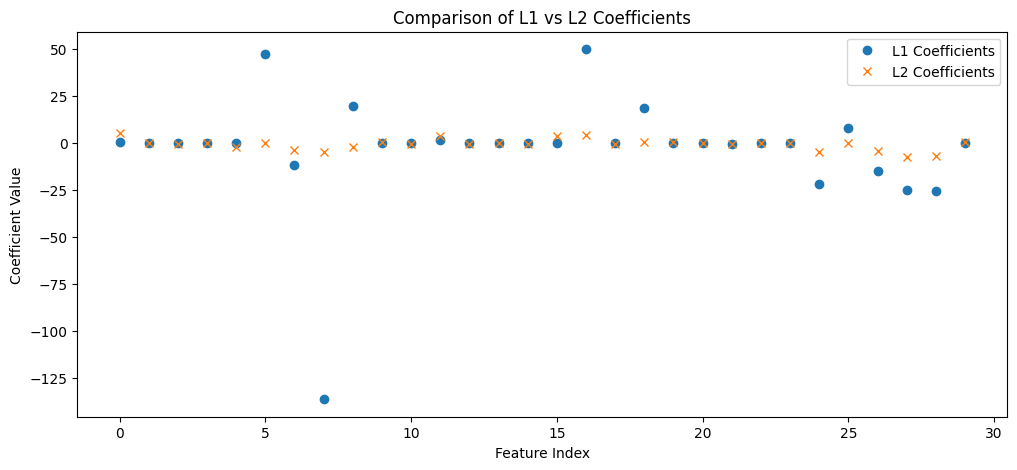

In [37]:
import matplotlib.pyplot as plt
# Import matplotlib for creating plots and visualizations

# Create a figure with specific size (width=12, height=5 inches)
plt.figure(figsize=(12,5))

# Plot L1 coefficients as circles ('o')
# model_l1.coef_ contains coefficients as a 2D array (1 row × n_features)
# .flatten() converts it to a 1D array for plotting
plt.plot(model_l1.coef_.flatten(), 'o', label='L1 Coefficients')

# Plot L2 coefficients as crosses ('x')
# .flatten() ensures the 2D array is 1D for proper plotting
plt.plot(model_l2.coef_.flatten(), 'x', label='L2 Coefficients')

# Set the label for the x-axis
plt.xlabel('Feature Index')
# Indicates each feature's position/index along the x-axis

# Set the label for the y-axis
plt.ylabel('Coefficient Value')
# Shows the magnitude (positive or negative) of each coefficient

# Set the title of the plot
plt.title('Comparison of L1 vs L2 Coefficients')
# Clearly indicates the plot shows L1 vs L2 coefficients

# Add a legend to distinguish L1 and L2 points
plt.legend()

# Display the plot on the screen
plt.show()
